# SRT 현황 분석

2024.01.11 ~ 2024.02.01

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: SRT 현황 분석 (가제)
- 설명: SRT의 승차권 판매 현황을 분석하는 프로젝트
- 사용한 데이터셋
    - [(주)에스알_SRT 승차권 발권](https://www.data.go.kr/data/15108354/openapi.do): 국민철도SR 승차권 발매현황 데이터로, "발매채널별 승차권 발매 현황", "SR 운영역 승차권 발매현황", "연도별 SR 승차권 발매현황", "특실/일반실 승차인원" 항목이 있습니다.
- 진행 절차 및 내용
    - 내용1
    - 내용2
- 사용한 스킬셋
    - pandas
    - matplotlib, seaborn
    - ...

### 1-2. 프로젝트 진행 배경

내용

---

## 2. 데이터 로딩 및 EDA

### 2-1. API 테스트

In [20]:
import requests
import json
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

#### 2-1-1. channel_sales

발매채널별 승차권 발매현황

In [2]:
with open('service_key.pkl', 'rb') as file:
    service_key = pickle.load(file)

In [48]:
url = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales'

params = {
    'serviceKey': service_key,
    'page': 1,
    'perPage': 100,
    'returnType': 'json',
    'cond[RUN_YMD::GTE]': '20231001', 
    'cond[RUN_YMD::LT]': '20231231'
}

response = requests.get(url, params=params)
json.loads(response.content)

{'currentCount': 100,
 'data': [{'PRT_CMPTN_QNTY': 0,
   'RFND_QNTY': 1,
   'ROUTE_NM': '경부선',
   'RUN_YMD': '20231001',
   'SELLNG_QNTY': 1,
   'SELLNG_WICKET_KND_CD': '0085',
   'SELLNG_WICKET_KND_NM': 'INTERNET',
   'SELLNG_YMD': '20230831'},
  {'PRT_CMPTN_QNTY': 0,
   'RFND_QNTY': 4,
   'ROUTE_NM': '경부선',
   'RUN_YMD': '20231001',
   'SELLNG_QNTY': 4,
   'SELLNG_WICKET_KND_CD': '0077',
   'SELLNG_WICKET_KND_NM': '스마트폰',
   'SELLNG_YMD': '20230905'},
  {'PRT_CMPTN_QNTY': 0,
   'RFND_QNTY': 6,
   'ROUTE_NM': '호남선',
   'RUN_YMD': '20231001',
   'SELLNG_QNTY': 6,
   'SELLNG_WICKET_KND_CD': '0077',
   'SELLNG_WICKET_KND_NM': '스마트폰',
   'SELLNG_YMD': '20230905'},
  {'PRT_CMPTN_QNTY': 0,
   'RFND_QNTY': 1,
   'ROUTE_NM': '경부선',
   'RUN_YMD': '20231001',
   'SELLNG_QNTY': 1,
   'SELLNG_WICKET_KND_CD': '0085',
   'SELLNG_WICKET_KND_NM': 'INTERNET',
   'SELLNG_YMD': '20230906'},
  {'PRT_CMPTN_QNTY': 32,
   'RFND_QNTY': 42,
   'ROUTE_NM': '경부선',
   'RUN_YMD': '20231001',
   'SELLNG_QNTY': 74,

In [43]:
pd.DataFrame(json.loads(response.content)['data'])

,PRT_CMPTN_QNTY,RFND_QNTY,ROUTE_NM,RUN_YMD,SELLNG_QNTY,SELLNG_WICKET_KND_CD,SELLNG_WICKET_KND_NM,SELLNG_YMD
0,0,1,경부선,20231001,1,0085,INTERNET,20230831
1,0,4,경부선,20231001,4,0077,스마트폰,20230905
2,0,6,호남선,20231001,6,0077,스마트폰,20230905
3,0,1,경부선,20231001,1,0085,INTERNET,20230906
4,32,42,경부선,20231001,74,0011,역,20230907
...,...,...,...,...,...,...,...,...
95,4,1,경부선,20231001,5,0027,철도공사 자회사 위탁운영역,20230916
96,0,1,경부선,20231001,1,0037,Tablet(자동발매기),20230916
97,390,709,경부선,20231001,1107,0077,스마트폰,20230916
98,6,17,경부선,20231001,23,0085,INTERNET,20230916


각 데이터가 무엇을 의미하는지를 알아야... 하는데...
- ```PRT_CMPTN_QNTY```: ?
- ```RFND_QNTY```: ...? 환불 이런 것 같기도
- ```ROUTE_NM```: 노선 이름
- ```RUN_YMD```: 열차 운영 날짜를 YYYYMMDD 형태로 표현
- ```SELLING_QNTY```: 판매 개수(한 번에 몇 장 구매했는지)
- ```SELLING_WICKET_KND_CD```: 판매 경로 코드
- ```SELLING_WICKET_KIN_NM```: 판매 경로
- ```SELLING_YMD```: 판매 날짜를 YYYYMMDD 형태로 표현

#### 2-1-2. srt_station_sales

SR 운영역 승차권 발매현황

In [44]:
url = 'https://apis.data.go.kr/B553912/tk_sales/v1/srt_station_sales'

params = {
    'serviceKey': service_key,
    'page': 1,
    'perPage': 100,
    'returnType': 'json',
    'cond[RUN_YMD::GTE]': '20231001', 
    'cond[RUN_YMD::LT]': '20231231'
}

response = requests.get(url, params=params)
json.loads(response.content)

{'currentCount': 100,
 'data': [{'PRT_CMPTN_QNTY': 20,
   'RFND_QNTY': 19,
   'ROUTE_NM': '경부선',
   'RUN_YMD': '20231001',
   'SELLNG_QNTY': 39,
   'SELLNG_STN_CD': '0551',
   'SELLNG_STN_NM': '수서',
   'SELLNG_YMD': '20230907'},
  {'PRT_CMPTN_QNTY': 6,
   'RFND_QNTY': 13,
   'ROUTE_NM': '경부선',
   'RUN_YMD': '20231001',
   'SELLNG_QNTY': 19,
   'SELLNG_STN_CD': '0552',
   'SELLNG_STN_NM': '동탄',
   'SELLNG_YMD': '20230907'},
  {'PRT_CMPTN_QNTY': 6,
   'RFND_QNTY': 6,
   'ROUTE_NM': '경부선',
   'RUN_YMD': '20231001',
   'SELLNG_QNTY': 12,
   'SELLNG_STN_CD': '0553',
   'SELLNG_STN_NM': '지제',
   'SELLNG_YMD': '20230907'},
  {'PRT_CMPTN_QNTY': 10,
   'RFND_QNTY': 10,
   'ROUTE_NM': '호남선',
   'RUN_YMD': '20231001',
   'SELLNG_QNTY': 20,
   'SELLNG_STN_CD': '0551',
   'SELLNG_STN_NM': '수서',
   'SELLNG_YMD': '20230907'},
  {'PRT_CMPTN_QNTY': 23,
   'RFND_QNTY': 12,
   'ROUTE_NM': '호남선',
   'RUN_YMD': '20231001',
   'SELLNG_QNTY': 35,
   'SELLNG_STN_CD': '0552',
   'SELLNG_STN_NM': '동탄',
   'SELL

In [45]:
pd.DataFrame(json.loads(response.content)['data'])

,PRT_CMPTN_QNTY,RFND_QNTY,ROUTE_NM,RUN_YMD,SELLNG_QNTY,SELLNG_STN_CD,SELLNG_STN_NM,SELLNG_YMD
0,20,19,경부선,20231001,39,0551,수서,20230907
1,6,13,경부선,20231001,19,0552,동탄,20230907
2,6,6,경부선,20231001,12,0553,지제,20230907
3,10,10,호남선,20231001,20,0551,수서,20230907
4,23,12,호남선,20231001,35,0552,동탄,20230907
...,...,...,...,...,...,...,...,...
95,4,0,경부선,20231001,4,0553,지제,20230926
96,2,8,호남선,20231001,10,0551,수서,20230926
97,3,0,호남선,20231001,3,0552,동탄,20230926
98,1,1,호남선,20231001,2,0553,지제,20230926


이번 데이터의 경우
- ```PRT_CMPTN_QNTY```: ?
- ```RFND_QNTY```: ?
- ```ROUTE_NM```: 노선 이름
- ```RUN_YMD```: 열차 운영 날짜를 YYYYMMDD 형태로 표현
- ```SELLING_QNTY```: 판매 개수(한 번에 몇 장 구매했는지)
- ```SELLING_STN_CD```: 판매 역 코드
- ```SELLING_STN_NM```: 판매 역
- ```SELLING_YMD```: 판매 날짜를 YYYYMMDD 형태로 표현

유저가 현장 발매 창구를 통해 구매한 것만을 의미하는지, 혹은 인터넷으로 구매한 유저라도 해당 역에서 탑승했다면 해당 역으로 집계되는 것인지 확인이 필요할 것 같다.

#### 2-1-3. yearly_sales

연도별 SR 승차권 발매현황

In [52]:
url = 'https://apis.data.go.kr/B553912/tk_sales/v1/yearly_sales'

params = {
    'serviceKey': service_key,
    'page': 1,
    'perPage': 100,
    'returnType': 'json',
    'cond[RUN_YR::GTE]': '2018', 
    'cond[RUN_YR::LTE]': '2023'
}

response = requests.get(url, params=params)
json.loads(response.content)

{'currentCount': 4,
 'data': [{'PRT_CMPTN_QNTY': 7243153,
   'RFND_QNTY': 4992679,
   'ROUTE_NM': '경부선',
   'RUN_YR': '2022',
   'SELLNG_QNTY': 12330420},
  {'PRT_CMPTN_QNTY': 2803787,
   'RFND_QNTY': 2002003,
   'ROUTE_NM': '호남선',
   'RUN_YR': '2022',
   'SELLNG_QNTY': 4854346},
  {'PRT_CMPTN_QNTY': 17978897,
   'RFND_QNTY': 13335563,
   'ROUTE_NM': '경부선',
   'RUN_YR': '2023',
   'SELLNG_QNTY': 31550478},
  {'PRT_CMPTN_QNTY': 7160244,
   'RFND_QNTY': 5544814,
   'ROUTE_NM': '호남선',
   'RUN_YR': '2023',
   'SELLNG_QNTY': 12823553}],
 'matchCount': 4,
 'page': 1,
 'perPage': 100,
 'totalCount': 4}

In [53]:
pd.DataFrame(json.loads(response.content)['data'])

,PRT_CMPTN_QNTY,RFND_QNTY,ROUTE_NM,RUN_YR,SELLNG_QNTY
0,7243153,4992679,경부선,2022,12330420
1,2803787,2002003,호남선,2022,4854346
2,17978897,13335563,경부선,2023,31550478
3,7160244,5544814,호남선,2023,12823553


이번 데이터의 경우
- ```PRT_CMPTN_QNTY```: 무슨 전체 양 이런 것 같다
- ```RFND_QNTY```: 그럼 이건 환불된 양일까
- ```ROUTE_NM```: 노선 이름
- ```RUN_YR```: 열차 운영 연도를 YYYY 형태로 표현
- ```SELLING_QNTY```: 판매 개수(총 몇 장 구매했는지)

시작연도를 2018년으로 넣었는데 2022년 이후 데이터밖에 안 준다.

#### 2-1-4. room_class_passengers

특실/일반실 승차인원

In [57]:
url = 'https://apis.data.go.kr/B553912/tk_sales/v1/room_class_passengers'

params = {
    'serviceKey': service_key,
    'page': 1,
    'perPage': 100,
    'returnType': 'json',
    'cond[RUN_YM::GTE]': '202201', 
    'cond[RUN_YM::LT]': '202312'
}

response = requests.get(url, params=params)
json.loads(response.content)

{'currentCount': 64,
 'data': [{'PSRM_GRD_CD': '1',
   'PSRM_GRD_NM': '일반실',
   'ROUTE_NM': '경부선',
   'RUN_YM': '202208',
   'TKCAR_NMPR_CNT': 1145743},
  {'PSRM_GRD_CD': '2',
   'PSRM_GRD_NM': '특실',
   'ROUTE_NM': '경부선',
   'RUN_YM': '202208',
   'TKCAR_NMPR_CNT': 78352},
  {'PSRM_GRD_CD': '1',
   'PSRM_GRD_NM': '일반실',
   'ROUTE_NM': '호남선',
   'RUN_YM': '202208',
   'TKCAR_NMPR_CNT': 433382},
  {'PSRM_GRD_CD': '2',
   'PSRM_GRD_NM': '특실',
   'ROUTE_NM': '호남선',
   'RUN_YM': '202208',
   'TKCAR_NMPR_CNT': 32316},
  {'PSRM_GRD_CD': '1',
   'PSRM_GRD_NM': '일반실',
   'ROUTE_NM': '경부선',
   'RUN_YM': '202209',
   'TKCAR_NMPR_CNT': 1328839},
  {'PSRM_GRD_CD': '2',
   'PSRM_GRD_NM': '특실',
   'ROUTE_NM': '경부선',
   'RUN_YM': '202209',
   'TKCAR_NMPR_CNT': 103303},
  {'PSRM_GRD_CD': '1',
   'PSRM_GRD_NM': '일반실',
   'ROUTE_NM': '호남선',
   'RUN_YM': '202209',
   'TKCAR_NMPR_CNT': 509760},
  {'PSRM_GRD_CD': '2',
   'PSRM_GRD_NM': '특실',
   'ROUTE_NM': '호남선',
   'RUN_YM': '202209',
   'TKCAR_NMPR_CNT': 

In [58]:
pd.DataFrame(json.loads(response.content)['data'])

,PSRM_GRD_CD,PSRM_GRD_NM,ROUTE_NM,RUN_YM,TKCAR_NMPR_CNT
0,1,일반실,경부선,202208,1145743
1,2,특실,경부선,202208,78352
2,1,일반실,호남선,202208,433382
3,2,특실,호남선,202208,32316
4,1,일반실,경부선,202209,1328839
...,...,...,...,...,...
59,2,특실,호남선,202310,48108
60,1,일반실,경부선,202311,1347644
61,2,특실,경부선,202311,102267
62,1,일반실,호남선,202311,591675


이번 데이터의 경우
- ```PSRM_GRD_CD```: 특실, 일반실 구분 코드 (일반실 = 1, 특실 = 2)
- ```PSRM_GRD_NM```: 특실, 일반실 구분
- ```ROUTE_NM```: 노선 이름
- ```RUN_YM```: 열차 운영 날짜를 YYYYMM 형태로 표현
- ```SELLING_QNTY```: 판매 개수(총 몇 장 구매했는지)

월별로 집계된 데이터고, 202201부터 달라고 했는데 202208부터 준다.

### 2-2. 데이터 로딩

In [22]:
url = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales'
results = []
i = 0
per_page = 20000
# per_page = 1

while True:
    params = {
        'serviceKey': service_key,
        'page': i,
        'perPage': per_page,
        'returnType': 'json',
        'cond[RUN_YMD::GTE]': '20220801',
        'cond[RUN_YMD::LTE]': '20240201'
    }

    response = requests.get(url, params=params)
    result = json.loads(response.content)['data']
    
    results += result
    print(f"데이터 불러오는 중 ... 현재 개수: {len(results)}")
    
    if len(result) < per_page:
        break
    
    i += 1

데이터 불러오는 중 ... 현재 개수: 20000
데이터 불러오는 중 ... 현재 개수: 40000
데이터 불러오는 중 ... 현재 개수: 60000
데이터 불러오는 중 ... 현재 개수: 80000
데이터 불러오는 중 ... 현재 개수: 100000
데이터 불러오는 중 ... 현재 개수: 120000
데이터 불러오는 중 ... 현재 개수: 140000
데이터 불러오는 중 ... 현재 개수: 160000
데이터 불러오는 중 ... 현재 개수: 165524


In [23]:
srt_df = pd.DataFrame(results)
srt_df

,PRT_CMPTN_QNTY,RFND_QNTY,ROUTE_NM,RUN_YMD,SELLNG_QNTY,SELLNG_WICKET_KND_CD,SELLNG_WICKET_KND_NM,SELLNG_YMD
0,1362,133,경부선,20220801,1521,0011,역,20220801
1,436,3,경부선,20220801,441,0013,PDA,20220801
2,98,3,경부선,20220801,101,0022,TMO(군장병 철도수송지원반),20220801
3,1078,90,경부선,20220801,1174,0027,철도공사 자회사 위탁운영역,20220801
4,954,29,경부선,20220801,989,0036,현금ATM,20220801
...,...,...,...,...,...,...,...,...
165519,6,1,호남선,20240130,7,0027,철도공사 자회사 위탁운영역,20240130
165520,92,3,호남선,20240130,95,0036,현금ATM,20240130
165521,157,19,호남선,20240130,180,0037,Tablet(자동발매기),20240130
165522,5613,2338,호남선,20240130,8010,0077,스마트폰,20240130


In [43]:
srt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165524 entries, 0 to 165523
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PRT_CMPTN_QNTY        165524 non-null  int64 
 1   RFND_QNTY             165524 non-null  int64 
 2   ROUTE_NM              165524 non-null  object
 3   RUN_YMD               165524 non-null  object
 4   SELLNG_QNTY           165524 non-null  int64 
 5   SELLNG_WICKET_KND_CD  165524 non-null  object
 6   SELLNG_WICKET_KND_NM  165524 non-null  object
 7   SELLNG_YMD            165524 non-null  object
dtypes: int64(3), object(5)
memory usage: 10.1+ MB


### 2-3. 데이터 분포 확인 및 전처리

#### 2-3-1. 판매량

판매량 관련 컬럼이 3개 있다.
- ```PRT_CMPTN_QNTY```: 판매
- ```RFND_QNTY```: 환불
- ```SELLNG_QNTY```: 총 판매

In [34]:
numerics = ['PRT_CMPTN_QNTY', 'RFND_QNTY', 'SELLNG_QNTY']
srt_df[numerics].describe()

,PRT_CMPTN_QNTY,RFND_QNTY,SELLNG_QNTY
count,165524.00000,165524.000000,165524.000000
mean,256.86034,187.193911,447.677201
std,1030.02304,598.570923,1595.939581
min,0.00000,0.000000,1.000000
25%,3.00000,1.000000,4.000000
50%,13.00000,6.000000,20.000000
75%,110.00000,59.000000,183.000000
max,18800.00000,11199.000000,29440.000000


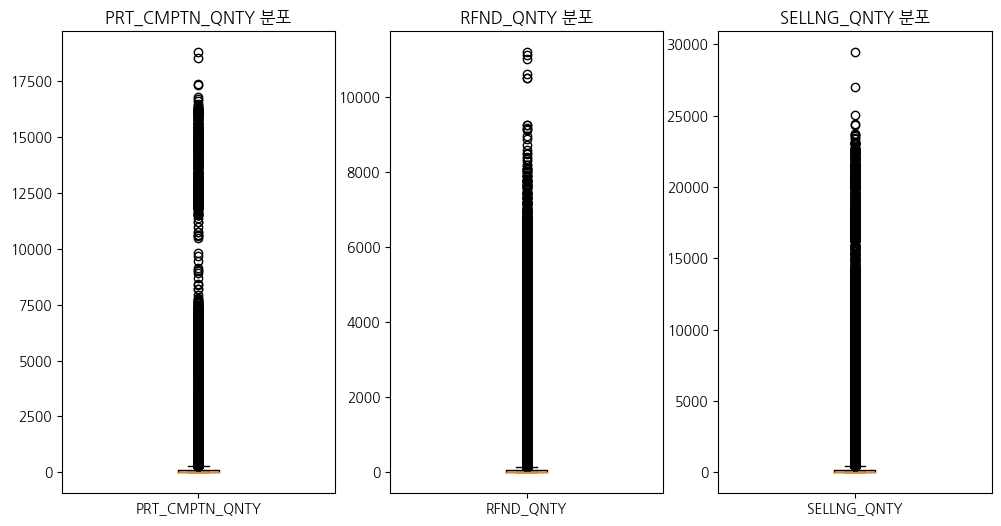

In [36]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6))

for i in range(len(numerics)):
    axes[i].boxplot(
        srt_df[numerics[i]],
        labels=[numerics[i]]
    )

    axes[i].set_title(f'{numerics[i]} 분포')
    
plt.show()

이상치가 너무 많아서 기묘한 분포다... 사실 이미 한 차례 집계된 분포라 큰 의미는 없을 수 있다.

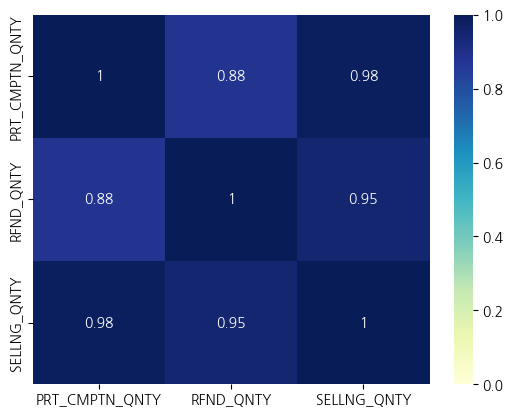

In [42]:
sns.heatmap(
    srt_df[numerics].corr(),
    annot=True,
    vmin=0,
    vmax=1,
    cmap='YlGnBu'
)

plt.show()

총 판매, 판매, 환불은 각각에 대해 매우 강한 상관관계를 지닌다!

#### 2-3-2. 노선명

In [45]:
srt_df['ROUTE_NM'].unique()

array(['경부선', '호남선'], dtype=object)

경부선, 호남선 2개의 노선이 있다.

In [46]:
by_route = srt_df.groupby('ROUTE_NM').agg({'PRT_CMPTN_QNTY': 'sum', 'RFND_QNTY': 'sum', 'SELLNG_QNTY': 'sum'})
by_route

,PRT_CMPTN_QNTY,RFND_QNTY,SELLNG_QNTY
ROUTE_NM,,,
경부선,30468947,21953101,52820191
호남선,12047604,9031984,21281130


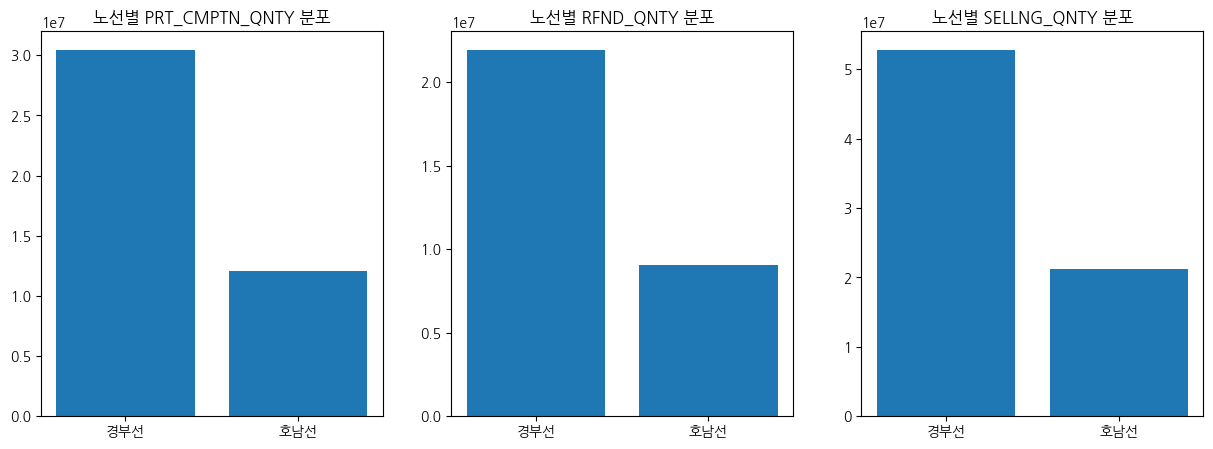

In [48]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

for i in range(len(numerics)):
    axes[i].bar(
        by_route.index,
        by_route[numerics[i]]
    )

    axes[i].set_title(f'노선별 {numerics[i]} 분포')
    
plt.show()

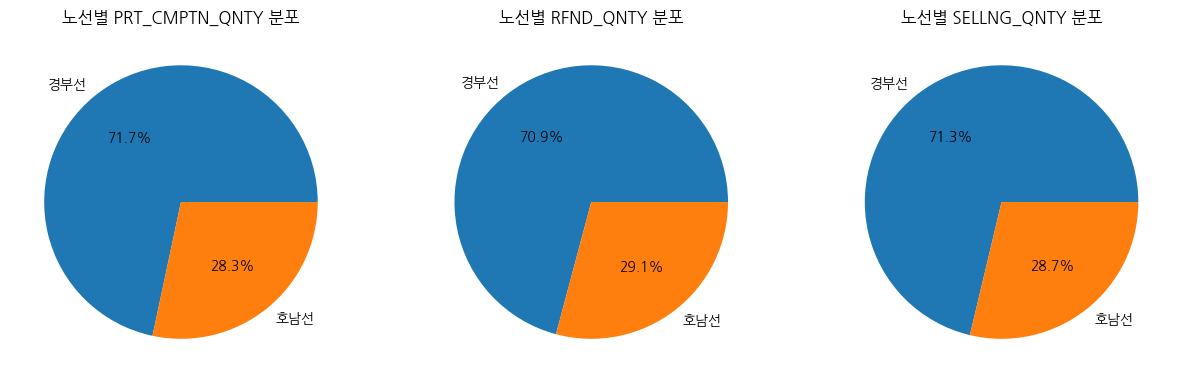

In [51]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

for i in range(len(numerics)):
    axes[i].pie(
        by_route[numerics[i]],
        autopct='%.1f%%',
        labels=by_route.index
    )

    axes[i].set_title(f'노선별 {numerics[i]} 분포')
    
plt.show()

경부선이 대략 71%, 호남선이 대략 29% 정도라고 보면 되겠다. 3가지 지표 각각에 대해 노선별 특성을 지니는지 확인해 보고 싶었으나 별다른 인사이트를 얻을 만한 결과가 나오진 않았다.

#### 2-3-3. 기차 운행일시

In [60]:
srt_df['year'] = pd.to_datetime(srt_df['RUN_YMD']).dt.year
srt_df['month'] = pd.to_datetime(srt_df['RUN_YMD']).dt.month

srt_df[['year', 'month']].value_counts(sort=False)

year  month
2022  8         9816
      9        15602
      10       15773
      11        7863
      12        8360
2023  1         8409
      2         7452
      3         7433
      4         8475
      5         8485
      6         8533
      7         8424
      8         8480
      9         8101
      10        8779
      11        8982
      12        8549
2024  1         8008
dtype: int64

2022년 8월부터 2024년 1월까지로 구성되어 있다.

In [74]:
by_year = srt_df.groupby('year', as_index=False).agg({'PRT_CMPTN_QNTY': 'sum', 'RFND_QNTY': 'sum', 'SELLNG_QNTY': 'sum'})
by_year[by_year['year'] == 2022] *= 12 / 5
by_year[by_year['year'] == 2024] *= 12
by_year['year'] = [2022, 2023, 2024]
by_year = by_year.set_index('year')
by_year

,PRT_CMPTN_QNTY,RFND_QNTY,SELLNG_QNTY
year,,,
2022,37315003.2,25601880,63448070.4
2023,24973841.0,18800472,44126393.0
2024,23937504.0,18205956,42458784.0


월 개수에 따라 단순 보정치를 넣어주었다.

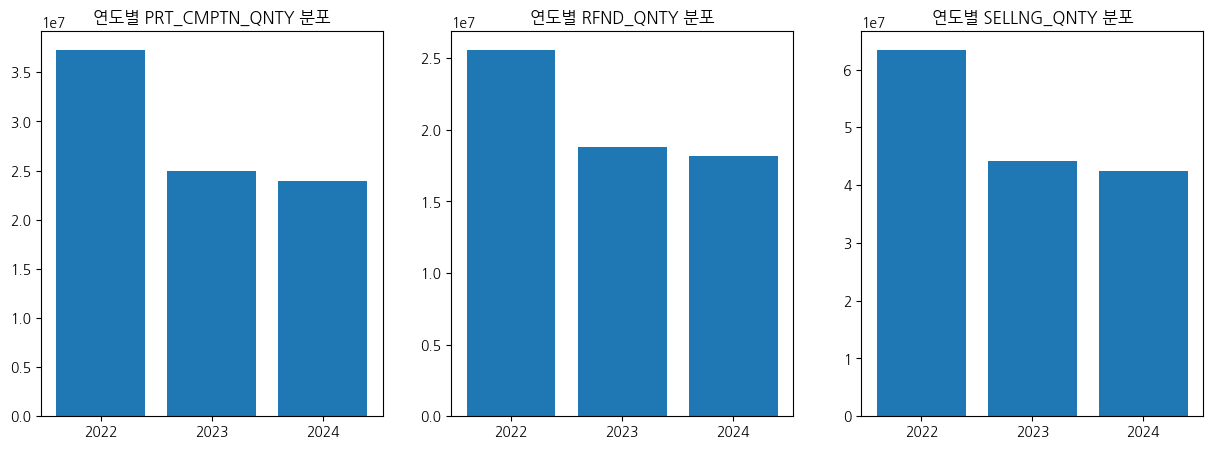

In [80]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

for i in range(len(numerics)):
    axes[i].bar(
        by_year.index.astype(str),
        by_year[numerics[i]]
    )

    axes[i].set_title(f'연도별 {numerics[i]} 분포')
    
plt.show()

보정치를 주었을 때 2022년의 값이 가장 높고 시간의 흐름에 따라 줄어드는 추세임을 파악할 수 있다. 다만 이는 단순히 선형 보정의 결과이기 때문에 신빙성이 높지는 않다.

#### 2-3-4. 판매 방법

In [83]:
srt_df['SELLNG_WICKET_KND_NM'].nunique()

10

In [89]:
by_kind = srt_df.groupby('SELLNG_WICKET_KND_NM').agg({
    'PRT_CMPTN_QNTY': 'sum', 'RFND_QNTY': 'sum', 'SELLNG_QNTY': 'sum'
}).sort_values('PRT_CMPTN_QNTY', ascending=False)

by_kind

,PRT_CMPTN_QNTY,RFND_QNTY,SELLNG_QNTY
SELLNG_WICKET_KND_NM,,,
스마트폰,37032652,29527179,67005965
역,1862884,333694,2220076
INTERNET,1375725,944434,2435116
철도공사 자회사 위탁운영역,801750,102623,910575
PDA,584546,3369,589387
현금ATM,552451,25895,582170
Tablet(자동발매기),225407,38570,267509
TMO(군장병 철도수송지원반),80832,9183,90069
신개념역,304,120,427


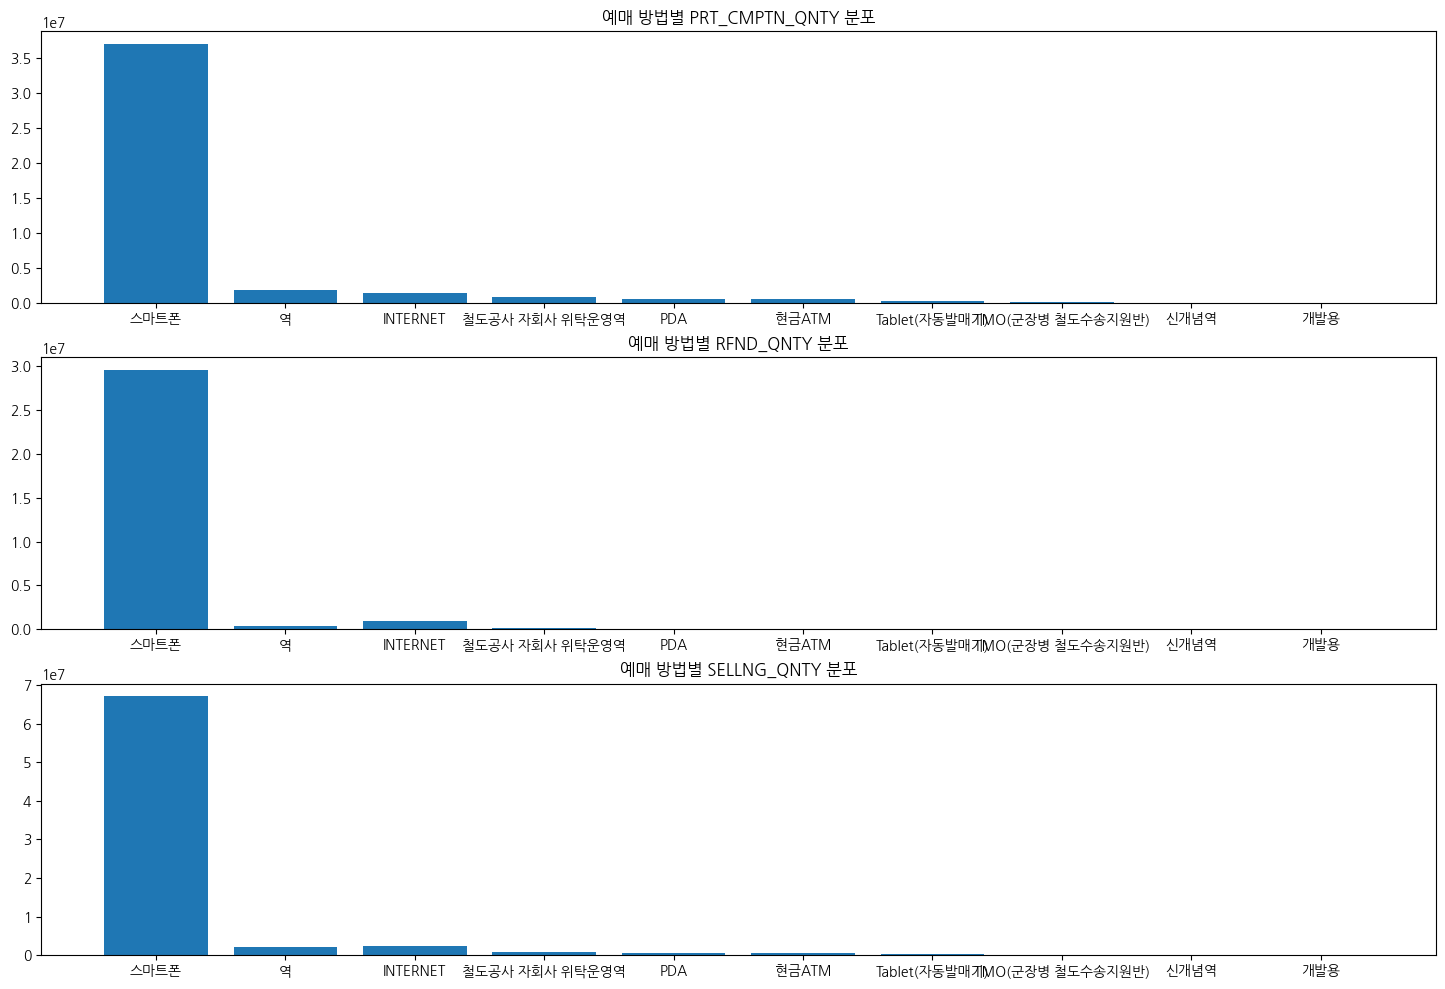

In [96]:
fig, axes = plt.subplots(nrows=3, figsize=(18, 12))

for i in range(len(numerics)):
    axes[i].bar(
        by_kind.index.astype(str),
        by_kind[numerics[i]]
    )
    axes[i].set_title(f'예매 방법별 {numerics[i]} 분포')
    
plt.show()

In [ ]:
srt_df.groupby('SELLNG_WICKET_KND_NM')

In [ ]:
# pickle로 저장

---

## 3. 데이터 분석

### 3-1. 문제 정의

내용

### 3-2. 데이터 분석

In [ ]:
# 가설 검정, 머신러닝, ...

### 3-3. 결과 해석

내용

---

## 4. 후기

내용